## Overview
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

### Project delivery:
We have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.



## Import Libraries


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Read in the datasets

##### Cab_Data

In [3]:
cab=pd.read_csv("C:/Users/Clyde Wawire/Desktop/Data Glacier/G2M insight/DataSets-main/DataSets-main/Cab_Data.csv")

cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab.shape

(359392, 7)

In [5]:
cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [6]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


### Checking Null values

In [8]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

No missing values

### Add profit column

In [9]:
cab['profit']=cab['Price Charged']-cab['Cost of Trip']

cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


### Add profit/KM column

In [22]:
cab['profit / Km'] = cab['profit']/cab['KM Travelled']

cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,profit / Km
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.929439


### Create month and year column

In [52]:
df['Date of Travel']= pd.to_datetime(df['Date of Travel'])
df['Year'] = pd.DatetimeIndex(df['Date of Travel']).year
df['Month'] = pd.DatetimeIndex(df['Date of Travel']).month
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,profit / Km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,29290,Card,Male,28,10813,"814,885","24,701",2016,1
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,29290,Cash,Male,28,10813,"814,885","24,701",2018,7
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,29290,Card,Male,28,10813,"814,885","24,701",2018,11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,27703,Card,Male,27,9237,"814,885","24,701",2016,1
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,27703,Card,Male,27,9237,"814,885","24,701",2018,4


##### Customer

In [10]:
customer=pd.read_csv("C:/Users/Clyde Wawire/Desktop/Data Glacier/G2M insight/DataSets-main/DataSets-main/Customer_ID.csv")

customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [11]:
customer.shape

(49171, 4)

In [12]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

##### Transaction

In [15]:
transaction=pd.read_csv("C:/Users/Clyde Wawire/Desktop/Data Glacier/G2M insight/DataSets-main/DataSets-main/Transaction_ID.csv")

transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [16]:
transaction.shape

(440098, 3)

In [17]:
transaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [18]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [20]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

##### City

In [30]:
city=pd.read_csv("C:/Users/Clyde Wawire/Desktop/Data Glacier/G2M insight/DataSets-main/DataSets-main/City.csv")

city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [31]:
city.shape

(20, 3)

In [32]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [117]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


##### Merge Datasets

In [24]:
df=cab.merge(transaction,on='Transaction ID')

df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,profit / Km,Customer ID,Payment_Mode
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266,29290,Card
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904,27703,Card
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558,28712,Cash
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751,28020,Cash
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,1.929439,27182,Card


In [25]:
df=df.merge(customer,on='Customer ID')

df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,profit / Km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,29290,Card,Male,28,10813
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,29290,Cash,Male,28,10813
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,29290,Card,Male,28,10813
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,27703,Card,Male,27,9237
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,27703,Card,Male,27,9237


In [33]:
df=df.merge(city,on='City')

df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,profit / Km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,27703,Card,Male,27,9237,"814,885","24,701"


### Profit by Company 

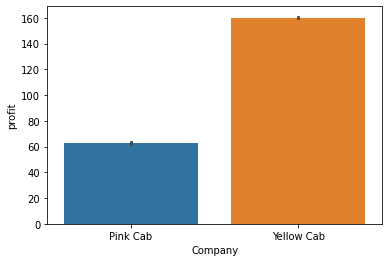

In [49]:
df.groupby('Company')['profit'].sum()
ax = sns.barplot(x="Company", y="profit", data=df)

- Yellow cab company records more profit compared to Pink cab company

### Average profit per km

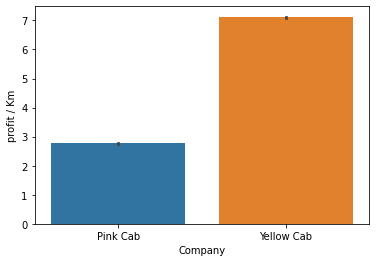

In [51]:
df.groupby('Company')['profit / Km'].mean()
ax = sns.barplot(x="Company", y="profit / Km", data=df)


- Yellow cab company records more profit per Kilometer covered in comparison to Pink cab company

### Percentage profit by Age Group

In [73]:
df['Age'].min()

18

In [74]:
df['Age'].max()

65

In [75]:
# Creating a new feature - age group
def age_cat(a):
    if a >= 18 and a < 26:
        return '18-25'
    elif a >= 26 and a < 36:
        return '26-35'
    elif a >= 36 and a < 46:
        return '36-45'
    elif a >= 46 and a < 56:
        return '46-55'
    else:
        return '56 and above'
    
df['Age Group'] = df['Age'].apply(age_cat)

df 

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,profit / Km,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Age Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,29290,Card,Male,28,10813,"814,885","24,701",2016,1,26-35
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,29290,Cash,Male,28,10813,"814,885","24,701",2018,7,26-35
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,29290,Card,Male,28,10813,"814,885","24,701",2018,11,26-35
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,27703,Card,Male,27,9237,"814,885","24,701",2016,1,26-35
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,27703,Card,Male,27,9237,"814,885","24,701",2018,4,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,3.740052,51406,Cash,Female,29,6829,"418,859","127,001",2018,3,26-35
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,6.455574,51406,Cash,Female,29,6829,"418,859","127,001",2018,4,26-35
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,-0.249531,51406,Card,Female,29,6829,"418,859","127,001",2018,7,26-35
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,-0.220652,51406,Cash,Female,29,6829,"418,859","127,001",2018,8,26-35


<AxesSubplot:title={'center':'Pink Cab - Profit by Age Group'}, xlabel='Age Group', ylabel='Percent of Profit'>

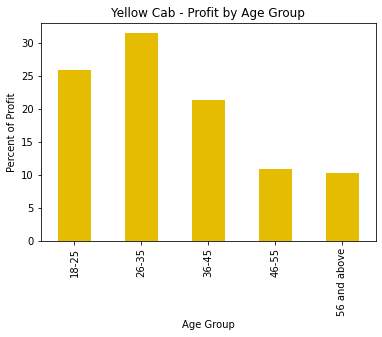

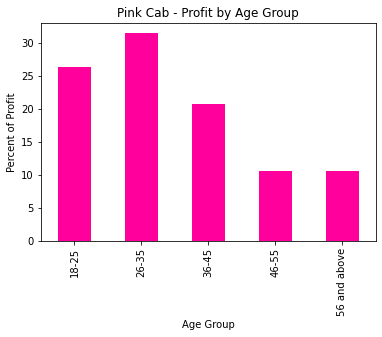

In [77]:
profit_by_age = df.groupby(['Company', 'Age Group'])[['profit']].sum().round(2)

#profit percent by age for each company
ppba_yellow = (profit_by_age.loc['Yellow Cab'] / profit_by_age.loc['Yellow Cab'].sum())*100
ppba_pink = (profit_by_age.loc['Pink Cab'] / profit_by_age.loc['Pink Cab'].sum())*100

ppba_yellow.plot(kind='bar', legend=False, color='#e6bc02', 
                 title='Yellow Cab - Profit by Age Group', ylabel='Percent of Profit')
ppba_pink.plot(kind='bar', legend=False, color='#ff009d', 
               title='Pink Cab - Profit by Age Group', ylabel='Percent of Profit')

- We can see that both cab companies share a very similar distribution of their profit accross their users' age groups.

- The biggest age group contributing to both companyies' profits are the 26-35 age group, followed by the 18-25 age group and then by the 36-45 age group.

- Users below 46 years old account for roughly 75% of the profit of both cab companies.

### Percentage profit by income bracket

In [78]:
df['Income (USD/Month)'].min()

2000

In [79]:
df['Income (USD/Month)'].max()

35000

In [82]:
company_profit_and_distance = df.groupby(['Company'])[['KM Travelled', 'profit']].sum().round(2)

company_profit_and_distance

,KM Travelled,profit
Company,,
Pink Cab,1911073.11,5307328.32
Yellow Cab,6199417.47,44020373.17


In [84]:
# Creating new feature - profit percentage per trip, per company:
total_profit_yellow = company_profit_and_distance.loc['Yellow Cab', 'profit']
total_profit_pink = company_profit_and_distance.loc['Pink Cab', 'profit']

def percent_income_by_company(row):
    if row['Company'] == 'Yellow Cab':
        return (row['profit'] / total_profit_yellow)*100
    elif row['Company'] == 'Pink Cab':
        return (row['profit'] / total_profit_pink)*100
    
df['% Profit of Company Total'] = df.apply(percent_income_by_company, axis=1)

In [86]:
# Creating new feature - Income Group:
def income_group(row):
    income = row['Income (USD/Month)']
    if income >=0 and income <=8000:
        return '0-8000'
    elif income > 8000 and income <=16000:
        return '8001-16000'
    elif income > 16000 and income <= 24000:
        return '16001-24000'
    elif income > 24000 and income <= 32000:
        return '24001-32000'
    elif income > 32000 and income <= 40000:
        return '32001-40000'
    
df['Income Group'] = df.apply(income_group, axis=1)

df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,profit / Km,Customer ID,...,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Age Group,% Profit of Company Total,Income Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,29290,...,Male,28,10813,"814,885","24,701",2016,1,26-35,0.001080,8001-16000
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,29290,...,Male,28,10813,"814,885","24,701",2018,7,26-35,0.000639,8001-16000
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,29290,...,Male,28,10813,"814,885","24,701",2018,11,26-35,0.000442,8001-16000
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,27703,...,Male,27,9237,"814,885","24,701",2016,1,26-35,0.000446,8001-16000
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,27703,...,Male,27,9237,"814,885","24,701",2018,4,26-35,0.000577,8001-16000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,143.6180,3.740052,51406,...,Female,29,6829,"418,859","127,001",2018,3,26-35,0.000326,0-8000
359388,10319775,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,23.0464,6.455574,51406,...,Female,29,6829,"418,859","127,001",2018,4,26-35,0.000052,0-8000
359389,10347676,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,-5.8540,-0.249531,51406,...,Female,29,6829,"418,859","127,001",2018,7,26-35,-0.000013,0-8000
359390,10358624,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,-6.0900,-0.220652,51406,...,Female,29,6829,"418,859","127,001",2018,8,26-35,-0.000014,0-8000


% Profit of Company Total
Company    Income Group                           
Pink Cab   0-8000                            23.31
           8001-16000                        31.30
           16001-24000                       32.01
           24001-32000                       10.52
           32001-40000                        2.86
Yellow Cab 0-8000                            22.83
           8001-16000                        31.77
           16001-24000                       32.19
           24001-32000                       10.48
           32001-40000                        2.73

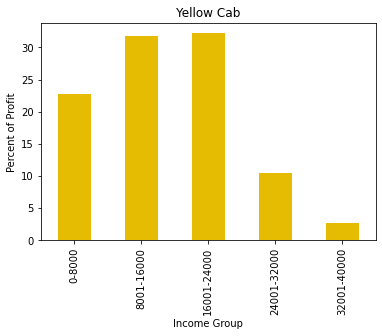

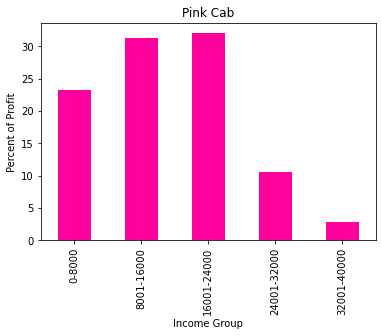

In [87]:
profit_by_income = df.groupby(['Company', 'Income Group'])[['% Profit of Company Total']].sum().round(2)

sorted_index = [('Pink Cab', '0-8000'),('Pink Cab', '8001-16000'),('Pink Cab', '16001-24000'),
                ('Pink Cab', '24001-32000'),('Pink Cab', '32001-40000'),
               ('Yellow Cab', '0-8000'),('Yellow Cab', '8001-16000'),('Yellow Cab', '16001-24000'),
                ('Yellow Cab', '24001-32000'),('Yellow Cab', '32001-40000')]

pbi = profit_by_income.loc[sorted_index]

pbi.loc['Yellow Cab'].plot(kind='bar', color='#e6bc02', legend=False, title='Yellow Cab', ylabel='Percent of Profit')
pbi.loc['Pink Cab'].plot(kind='bar', color='#ff009d', legend=False, title='Pink Cab', ylabel='Percent of Profit')

pbi

- We can see from our analysis that both companies have almost identical user income segments, the user income segments with the highest contribution to profit are the 16k-24k and then the 8k-16k income brackets, and then the users with an income of 0-8k, together these 3 give us around 86% of the profit for each company.

### Profit by Payment Mode

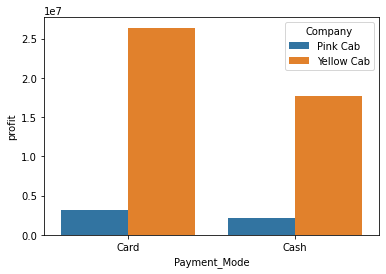

In [98]:
pay=df.groupby(['Company', 'Payment_Mode'], as_index=False)['profit'].sum()

sns.barplot(x = "Payment_Mode", y = "profit", hue = "Company", data =pay)
plt.show()

- Yellow cab company records higher profits than Pink cab company in both card and cash payments<br>
- Card payments bring in more profits than cash payments



### Profit by Gender

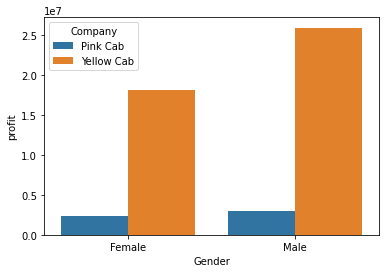

In [99]:
Gender=df.groupby(['Company', 'Gender'], as_index=False)['profit'].sum()
sns.barplot(x = "Gender", y = "profit", hue = "Company", data = Gender)
plt.show()

- Yellow cab company posts more profits than Pink cab for the both genders<br>
- Pink cab company posts almost significant profits for both genders


Text(0, 0.5, 'Profit')

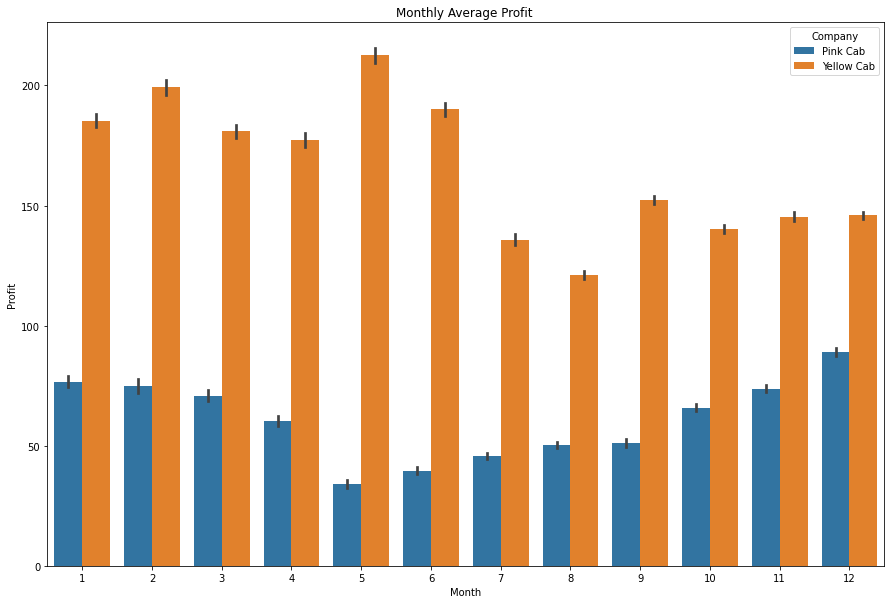

In [100]:
df_Profit_avg=df.groupby(["Year", "Month"])["profit"].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="Month", y="profit", hue = "Company", data=df)
plt.title("Monthly Average Profit ")
plt.xlabel("Month")
plt.ylabel("Profit")

- Yellow cab company posts more average monthly profits than Pink cab company.

Text(0, 0.5, 'Profit')

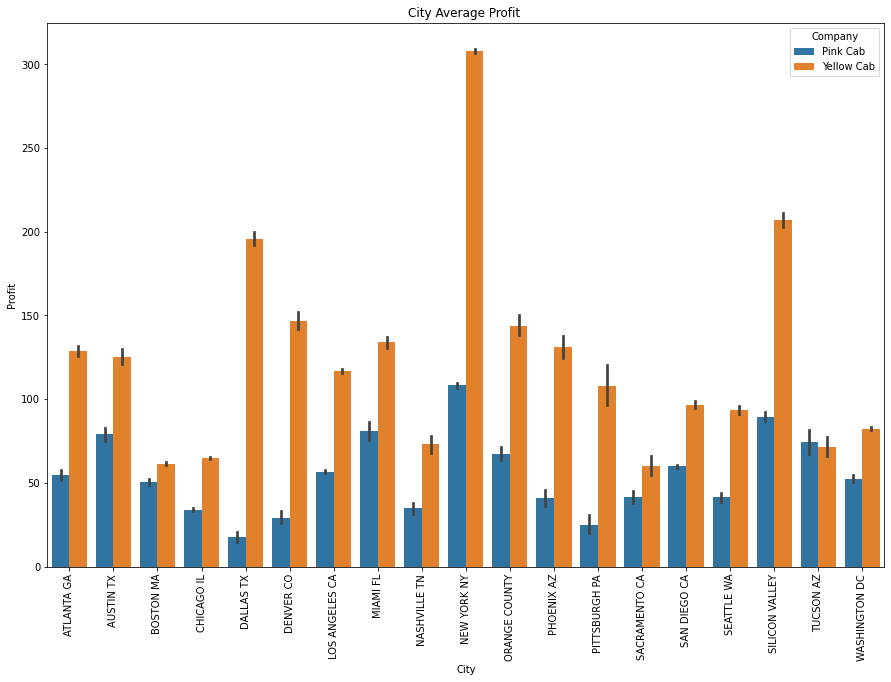

In [109]:
df_Profit_avg=df.groupby(["City"])["profit"].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x="City", y="profit", hue = "Company", data=df)
plt.title("City Average Profit ")
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("Profit")

- Yellow cab company posts more City average profits than Pink cab company<br>
- New York city records the highest City average profits for both companies

In [102]:
#Extract dat of the week
df['Day_of_week'] = df['Date of Travel'].dt.day_name()
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,profit / Km,Customer ID,...,Age,Income (USD/Month),Population,Users,Year,Month,Age Group,% Profit of Company Total,Income Group,Day_of_week
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,29290,...,28,10813,"814,885","24,701",2016,1,26-35,0.001080,8001-16000,Friday
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,29290,...,28,10813,"814,885","24,701",2018,7,26-35,0.000639,8001-16000,Saturday
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,29290,...,28,10813,"814,885","24,701",2018,11,26-35,0.000442,8001-16000,Friday
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,27703,...,27,9237,"814,885","24,701",2016,1,26-35,0.000446,8001-16000,Wednesday
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,27703,...,27,9237,"814,885","24,701",2018,4,26-35,0.000577,8001-16000,Saturday


Text(0, 0.5, 'Profit')

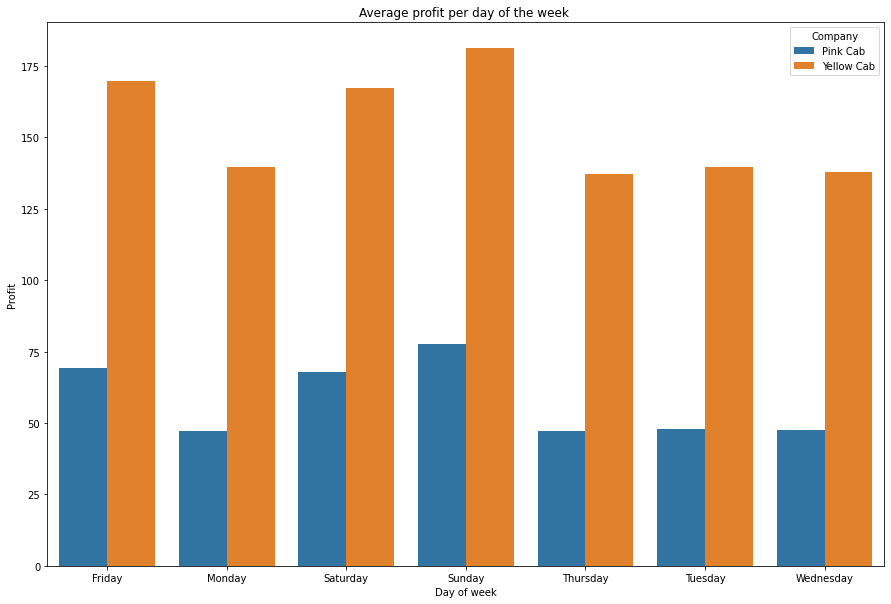

In [104]:
df_Profit_avg=df.groupby(["Company", "Day_of_week"])["profit"].mean().reset_index()
plt.figure(figsize=(15,10))
g=sns.barplot(x="Day_of_week", y="profit", hue = "Company", data=df_Profit_avg)
plt.title("Average profit per day of the week ")
plt.xlabel("Day of week")
plt.ylabel("Profit")


- Both companies record maximum profits on Sundays

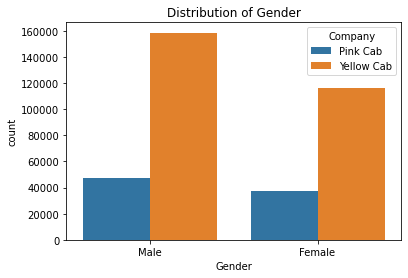

In [105]:
sns.countplot(x='Gender', data=df, hue="Company");
plt.title('Distribution of Gender');

- There's high preference towards Yellow cab company for both gender

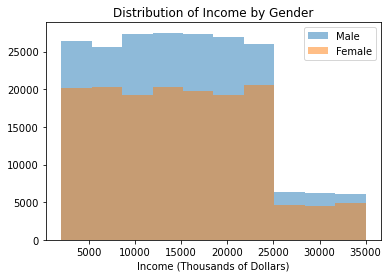

In [106]:
# Histogram of income by gender
plt.hist('Income (USD/Month)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Income (USD/Month)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


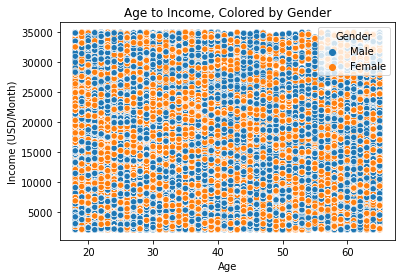

In [107]:
sns.scatterplot('Age', 'Income (USD/Month)', hue='Gender', data=df);
plt.title('Age to Income, Colored by Gender');
#There is no clear correlation 

## Recommendation:
After reviewing all of the data and analyzing it - my recommendation to XYZ company is to invest in Yellow cab company as they have proved to be a much more profitable company, which serves more customers, and has much higher customer loyalty and is more profitable for every trip.